In [1]:
# 初期設定的な何か
%matplotlib inline
import pandas

pandas.options.display.max_columns = 30
pandas.options.display.max_rows = 30


In [2]:
# 坂本勇人の成績表を取得する
url = 'http://npb.jp/bis/players/51955114.html'
df = pandas.io.html.read_html(url)


In [3]:
# 出力
df

[                                  0   \
 0                                NaN   
 1                                NaN   
 2                              坂本　勇人   
 3                                  6   
 4                           さかもと・はやと   
 5  1988年12月14日生 身長186cm 体重83kg 右投 右打   
 6                              光星学院高   
 7                    2006年高校生ドラフト1巡目   
 
                                                   1   2         3      4   \
 0  球団サイト選手一覧へ読売ジャイアンツ坂本　勇人6内野手2016年度シーズン終了　現在さかもと... NaN  読売ジャイアンツ  坂本　勇人   
 1                                           読売ジャイアンツ NaN       NaN    NaN   
 2                                                NaN NaN       NaN    NaN   
 3                                                内野手 NaN       NaN    NaN   
 4                                                NaN NaN       NaN    NaN   
 5                                                NaN NaN       NaN    NaN   
 6                                                NaN NaN       NaN    NaN   
 7   

In [4]:
#  4個目のDataframeが成績表っぽい,計算に使わない・邪魔なレコードを削除
atbats = df[3].drop([0, 11])

# 一旦出力してみる
atbats


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,2007,読 売,4,3,3,1,1,0,0,0,1,2,1,0,0,0,0,0,0,0,.333,.333,.333
2,2008,読 売,144,567,521,59,134,24,1,8,184,43,10,5,15,1,28,2,98,2,.257,.353,.297
3,2009,読 売,141,640,581,87,178,33,3,18,271,62,5,3,7,4,44,4,101,8,.306,.466,.357
4,2010,読 売,144,676,609,107,171,35,4,31,307,85,14,4,10,7,47,3,83,6,.281,.504,.332
5,2011,読 売,144,624,568,69,149,27,2,16,228,59,8,1,10,3,37,6,91,3,.262,.401,.313
6,2012,読 売,144,619,557,87,173,35,2,14,254,69,16,1,12,5,39,6,90,5,.311,.456,.359
7,2013,読 売,144,620,554,73,147,33,1,12,218,54,24,4,4,3,55,4,87,11,.265,.394,.334
8,2014,読 売,144,616,545,82,152,29,0,16,229,61,23,5,9,5,55,2,88,3,.279,.420,.344
9,2015,読 売,130,558,479,50,129,21,3,12,192,68,10,4,9,5,65,0,79,5,.269,.401,.353
10,2016,読 売,137,576,488,96,168,28,3,23,271,75,13,3,1,6,81,0,67,6,.344,.555,.433


In [5]:

#　カラム名を付与する(野球英語の略称)
atbats.columns = ['year', 'team', 'g', 'pa', 'ab', 'r', 'h', '_2b', '_3b', 'hr', 'tb', 'rbi', 'sb', 'cs', 'sh', 'sf', 'bb', 'hbp', 'so', 'dp', 'ba', 'slg', 'obp']

# 各カラムを前処理する
import numpy as np
atbats['year'] = atbats['year'].fillna(0).astype(np.int)
atbats['g'] = atbats['g'].fillna(0).astype(np.float64)
atbats['pa'] = atbats['pa'].fillna(0).astype(np.float64)
atbats['ab'] = atbats['ab'].fillna(0).astype(np.float64)
atbats['r'] = atbats['r'].fillna(0).astype(np.float64)
atbats['h'] = atbats['h'].fillna(0).astype(np.float64)
atbats['_2b'] = atbats['_2b'].fillna(0).astype(np.float64)
atbats['_3b'] = atbats['_3b'].fillna(0).astype(np.float64)
atbats['hr'] = atbats['hr'].fillna(0).astype(np.float64)
atbats['tb'] = atbats['tb'].fillna(0).astype(np.float64)
atbats['rbi'] = atbats['rbi'].fillna(0).astype(np.float64)
atbats['sb'] = atbats['sb'].fillna(0).astype(np.float64)
atbats['cs'] = atbats['cs'].fillna(0).astype(np.float64)
atbats['sh'] = atbats['tb'].fillna(0).astype(np.float64)
atbats['sf'] = atbats['sf'].fillna(0).astype(np.float64)
atbats['bb'] = atbats['bb'].fillna(0).astype(np.float64)
atbats['hbp'] = atbats['hbp'].fillna(0).astype(np.float64)
atbats['so'] = atbats['so'].fillna(0).astype(np.float64)
atbats['dp'] = atbats['dp'].fillna(0).astype(np.float64)
atbats['ba'] = atbats['ba'].fillna(0).astype(np.float64)
atbats['slg'] = atbats['slg'].fillna(0).astype(np.float64)
atbats['obp'] = atbats['obp'].fillna(0).astype(np.float64)

# 軽く出力
atbats

,year,team,g,pa,ab,r,h,_2b,_3b,hr,tb,rbi,sb,cs,sh,sf,bb,hbp,so,dp,ba,slg,obp
1,2007,読 売,4.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333,0.333,0.333
2,2008,読 売,144.0,567.0,521.0,59.0,134.0,24.0,1.0,8.0,184.0,43.0,10.0,5.0,184.0,1.0,28.0,2.0,98.0,2.0,0.257,0.353,0.297
3,2009,読 売,141.0,640.0,581.0,87.0,178.0,33.0,3.0,18.0,271.0,62.0,5.0,3.0,271.0,4.0,44.0,4.0,101.0,8.0,0.306,0.466,0.357
4,2010,読 売,144.0,676.0,609.0,107.0,171.0,35.0,4.0,31.0,307.0,85.0,14.0,4.0,307.0,7.0,47.0,3.0,83.0,6.0,0.281,0.504,0.332
5,2011,読 売,144.0,624.0,568.0,69.0,149.0,27.0,2.0,16.0,228.0,59.0,8.0,1.0,228.0,3.0,37.0,6.0,91.0,3.0,0.262,0.401,0.313
6,2012,読 売,144.0,619.0,557.0,87.0,173.0,35.0,2.0,14.0,254.0,69.0,16.0,1.0,254.0,5.0,39.0,6.0,90.0,5.0,0.311,0.456,0.359
7,2013,読 売,144.0,620.0,554.0,73.0,147.0,33.0,1.0,12.0,218.0,54.0,24.0,4.0,218.0,3.0,55.0,4.0,87.0,11.0,0.265,0.394,0.334
8,2014,読 売,144.0,616.0,545.0,82.0,152.0,29.0,0.0,16.0,229.0,61.0,23.0,5.0,229.0,5.0,55.0,2.0,88.0,3.0,0.279,0.420,0.344
9,2015,読 売,130.0,558.0,479.0,50.0,129.0,21.0,3.0,12.0,192.0,68.0,10.0,4.0,192.0,5.0,65.0,0.0,79.0,5.0,0.269,0.401,0.353
10,2016,読 売,137.0,576.0,488.0,96.0,168.0,28.0,3.0,23.0,271.0,75.0,13.0,3.0,271.0,6.0,81.0,0.0,67.0,6.0,0.344,0.555,0.433


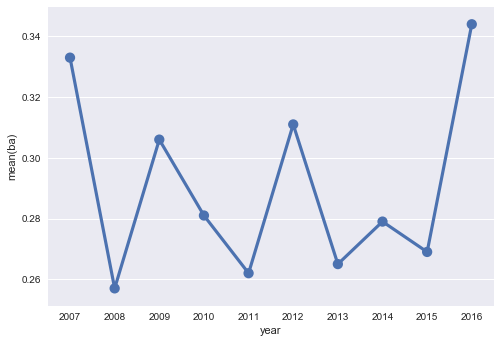

In [6]:

# グラフを描く(seabornで)
import seaborn as sns

# 打率(ba, batting average)を折れ線グラフに
sns.pointplot(x="year", y="ba", data=atbats)




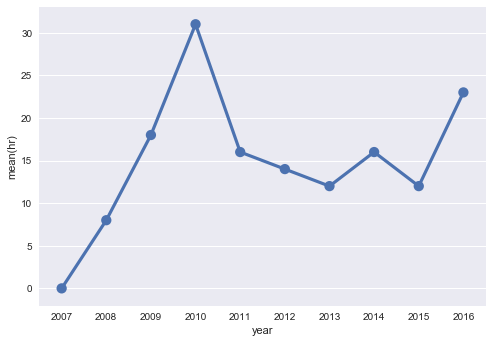

In [7]:
# 本塁打(hr)
sns.pointplot(x="year", y="hr", data=atbats)

In [8]:
# 野球統計学(セイバーメトリクス)指標を計算して可視化する

atbats['ops'] = atbats['obp'] + atbats['slg'] # OPS
atbats['bb_k'] = atbats['bb'] / atbats['so'] # BB/K
atbats['noi'] = (atbats['obp'] + atbats['slg'] / 3) * 1000 # NOI(New Offensive Index)

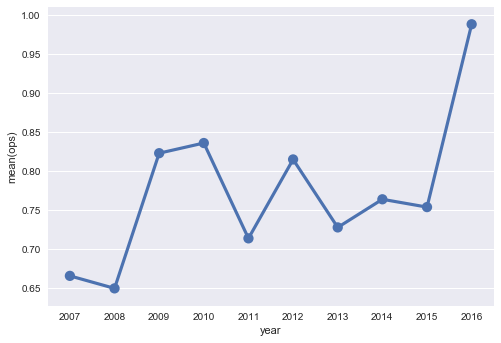

In [9]:
# OPS
sns.pointplot(x="year", y="ops", data=atbats)

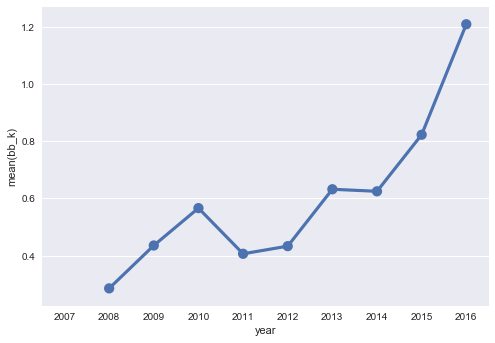

In [10]:
# BB/K
sns.pointplot(x="year", y="bb_k", data=atbats)

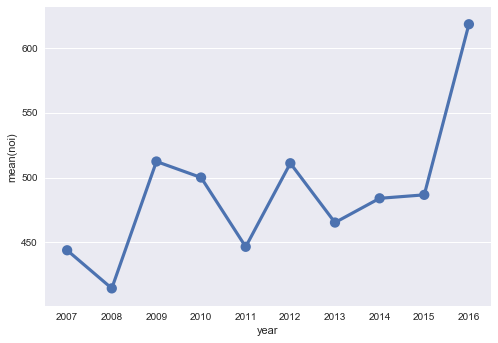

In [11]:
# NOI
sns.pointplot(x="year", y="noi", data=atbats)